In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

In [69]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [42]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num of GPUs Available: ", len(physical_devices))
if len(physical_devices)>0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print("Running on GPU...")
else:
  print("Running on CPU...")

Num of GPUs Available:  0
Running on CPU...


In [7]:
vgg19 = VGG19(include_top=False , input_shape=(224,224,3) , weights='imagenet')

80134624/80134624 [==============================] - 14s 0us/step


In [8]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
for layer in vgg19.layers:
    layer.trainable = False

In [12]:
folder = glob('Vegetable Images/train/*')
len(folder)

15

In [14]:
folder

['Vegetable Images/train\\Bean',
 'Vegetable Images/train\\Bitter_Gourd',
 'Vegetable Images/train\\Bottle_Gourd',
 'Vegetable Images/train\\Brinjal',
 'Vegetable Images/train\\Broccoli',
 'Vegetable Images/train\\Cabbage',
 'Vegetable Images/train\\Capsicum',
 'Vegetable Images/train\\Carrot',
 'Vegetable Images/train\\Cauliflower',
 'Vegetable Images/train\\Cucumber',
 'Vegetable Images/train\\Papaya',
 'Vegetable Images/train\\Potato',
 'Vegetable Images/train\\Pumpkin',
 'Vegetable Images/train\\Radish',
 'Vegetable Images/train\\Tomato']

In [17]:
x = Flatten()(vgg19.output)

In [18]:
prediction = Dense(len(folder), activation='softmax')(x)

In [20]:
model = Model(inputs=vgg19.input , outputs = prediction)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
model.compile(optimizer='adam', 
              loss = tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [25]:
train = ImageDataGenerator( rescale=1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True)

test = ImageDataGenerator(rescale=1./255)  

valid = ImageDataGenerator(rescale=1./255)                    

In [38]:
train_data = train.flow_from_directory('Vegetable Images/train',
                                       target_size=(224,224),
                                       class_mode = 'categorical')

Found 15000 images belonging to 15 classes.


In [39]:
test_data = test.flow_from_directory('Vegetable Images/test',
                                     target_size=(224,224),
                                     class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [40]:
validation_data = valid.flow_from_directory('Vegetable Images/validation',
                                            target_size=(224,224),
                                            class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [43]:
model_history = model.fit(train_data,
                          validation_data=validation_data,
                          epochs=5,
                          batch_size=20,
                          steps_per_epoch=len(train_data),
                          validation_steps=len(validation_data))

Epoch 1/5
469/469 [==============================] - 3023s 6s/step - loss: 0.2608 - accuracy: 0.9229 - val_loss: 0.0744 - val_accuracy: 0.9777
Epoch 2/5
469/469 [==============================] - 3467s 7s/step - loss: 0.0993 - accuracy: 0.9684 - val_loss: 0.0773 - val_accuracy: 0.9750
Epoch 3/5
469/469 [==============================] - 3443s 7s/step - loss: 0.0712 - accuracy: 0.9767 - val_loss: 0.0676 - val_accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 3750s 8s/step - loss: 0.0684 - accuracy: 0.9780 - val_loss: 0.0556 - val_accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 3250s 7s/step - loss: 0.0583 - accuracy: 0.9813 - val_loss: 0.0641 - val_accuracy: 0.9830


In [44]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

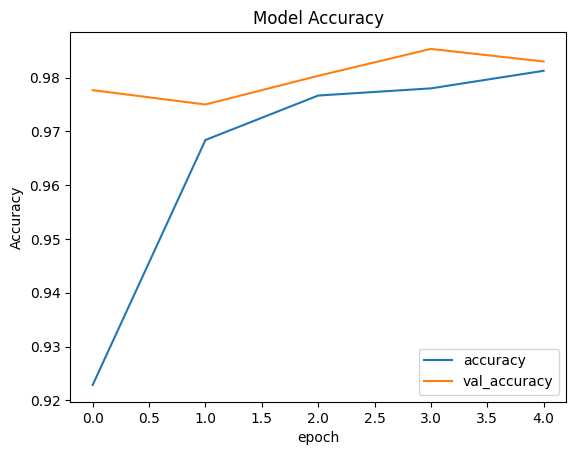

In [47]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy','val_accuracy'],loc = 'lower right')
plt.show()

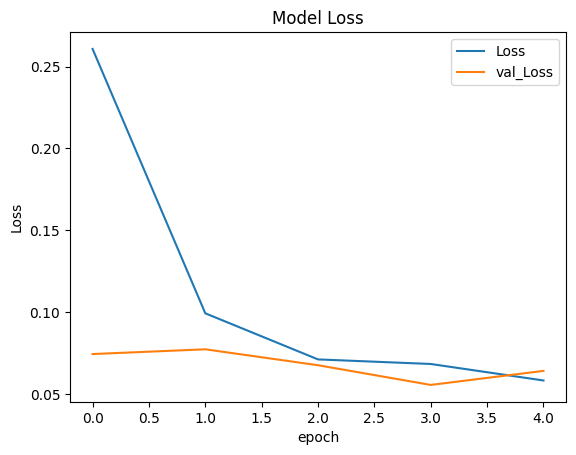

In [48]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Loss','val_Loss'],loc = 'upper right')
plt.show()

In [60]:
predict = model.predict(test_data)

94/94 [==============================] - 485s 5s/step


In [61]:
predict

array([[1.00798907e-08, 1.49232213e-15, 4.91379645e-11, ...,
        3.36562332e-12, 1.00000000e+00, 3.57338048e-11],
       [2.11153929e-06, 8.64376348e-10, 5.07021480e-10, ...,
        3.10133174e-07, 2.11637882e-07, 3.68661102e-13],
       [2.94169752e-16, 6.13893214e-13, 9.40864759e-18, ...,
        8.13437945e-12, 5.15738668e-16, 3.61193510e-17],
       ...,
       [1.43028018e-07, 3.42565212e-11, 1.64197350e-10, ...,
        8.82171562e-08, 6.53385809e-12, 7.97263944e-09],
       [1.60554336e-07, 1.39865515e-11, 7.91303137e-07, ...,
        2.98678102e-13, 4.74019589e-06, 5.78940273e-09],
       [1.30510361e-05, 3.57824933e-06, 1.35322750e-07, ...,
        3.42552231e-09, 1.59076917e-05, 2.86629966e-05]], dtype=float32)

In [68]:
test_data.classes

array([ 0,  0,  0, ..., 14, 14, 14])

In [81]:
test_data.class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [83]:
prediction = np.argmax(predict, axis=1)
prediction

array([13,  5,  4, ...,  3,  9,  7], dtype=int64)

In [84]:
model.save('model.h5')

C:\Users\abhes\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
